# Demand Forecast for e-scooter business
### by: Rama Salahat
***


in this notebook we're using data from the <a href="https://data.austintexas.gov/Transportation-and-Mobility/Shared-Micromobility-Vehicle-Trips/7d8e-dm7r">Austin Texas data website</a> 
that tracks e-scooter rental data in Austin since 2018. <br><br>
We're going to do the following:
- EDA and Feature Engineering 
- Build a Gradient Boosting Tree Model
- Hyperparameters Tuning with Cross-Validation to improve the score


<img src="https://www.austinprestigelimo.com/wp-content/uploads/2020/06/AUSTIN-TX.png">

## Table of Contents
- [**Importing packages and reading the data**](#import)
- [**Data Cleansing**](#clean)
- [**Plot functions for EDA**](#plots)
- [**EDA and Feature Engineering**](#EDA)
    - [Device ID stats](#deviceID)
    - [Trip Duration outliers](#duration)
    - [Trip Distance outliers](#distance)
    - [Distribution of trips among years](#yearsVScount)
    - [Trips ditribution among Months](#monthsVScount)
    - [Trip distribution among the day of the week](#dayVScount)
    - [Distribution of trips among hour of the day](#hourVScount)
    - [Distribution of trips among Council Districts](#districtVScount)
    - [Trip distibution among multiple factors simultaneously](#multi)
        - [Trip counts: Vehicle Type vs. Season, Hour, period of the day, and Day of Week](#multi1)
        - [Trip counts: Day of Week vs Hour and period of the day](#multi2)
    - [Trip Distribution Among Austin's Census data](#census)

- [**Machine Learning Model**](#demand)
    - [Building The Demand Data](#demand)
    - [Gradient Boosting Regressor](#regressor)
    - [Hyper Parameters Tuning with Cross Validation](#hyper)    
- [**Model Interpretation**](#Interpretation)



***

## Importing packages and reading the data <a class="anchor" id="import"></a>

In [1]:
#importing needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading data
data = pd.read_csv("Shared_Micromobility_Vehicle_Trips (1).csv")
data

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End
0,f33ffbe9-7462-4310-8d79-382842d4f374,61a22e55-d5b3-4fde-8d9a-ccaed12ce35c,scooter,2133,12794.0,04/18/2020 05:15:00 AM,04/18/2020 05:45:00 AM,04/19/2020 07:30:34 AM,4,5,5,9,4,2020,48453001100,48453001806
1,ddf0fa7c-41e2-43c4-b7ea-e4b7a323be78,f07ddca9-59b3-4ac0-a02b-459a42f8b58b,scooter,197,917.0,04/18/2020 05:30:00 AM,04/18/2020 05:45:00 AM,04/19/2020 07:30:33 AM,4,5,5,3,3,2020,48453000902,48453000902
2,2d895f0c-9586-4458-9e58-99cac4bc0191,8ced24e4-7396-4bd4-884a-fc7733ecfae3,scooter,721,3621.0,04/18/2020 05:15:00 AM,04/18/2020 05:30:00 AM,04/19/2020 07:30:33 AM,4,5,5,9,1,2020,48453000304,48453002105
3,b180f674-0e1d-4d78-9838-2b20a45bf9d2,1ed7b1f7-a174-422e-a4a2-d688e59732a9,scooter,214,788.0,04/18/2020 05:15:00 AM,04/18/2020 05:15:00 AM,04/19/2020 07:30:33 AM,4,5,5,5,5,2020,48453001901,48453001901
4,aa2bc2f8-fd08-4e58-85c4-90c44be2fe4d,4da13a13-db11-4610-a844-97a19d82fefa,scooter,622,3009.0,04/18/2020 05:00:00 AM,04/18/2020 05:15:00 AM,04/19/2020 07:30:33 AM,4,5,5,9,9,2020,48453000601,48453000304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10086285,5309c062-61da-4cf7-aa60-3f8f92ac399c,ff9d2a7f-dc31-4742-9c51-0b1fdcdd25d4,bicycle,526,2832.0,12/09/2020 12:45:00 AM,12/09/2020 01:00:00 AM,12/10/2020 02:16:31 AM,12,1,2,3,9,2020,48453000902,48453000700
10086286,f0298de5-1e04-4162-9937-d7075837d6e3,366106d8-9af0-40a9-9627-6db4cf23b2fc,scooter,295,5.0,12/09/2020 12:45:00 AM,12/09/2020 01:00:00 AM,12/10/2020 02:16:40 AM,12,1,2,9,9,2020,48453001100,48453001100
10086287,b4dd4db1-75a1-4045-bc29-445ea2f31e9f,53f9a31e-63fd-4d2b-a843-ce165941493b,bicycle,96,224.0,12/09/2020 01:00:00 AM,12/09/2020 01:00:00 AM,12/10/2020 02:16:44 AM,12,1,2,9,9,2020,48453001100,48453001100
10086288,1d3cda92-0c97-48ae-84d1-ff5e40db143e,310fefe8-ded9-4829-9c69-1201efc0ed5d,scooter,208,23.0,12/09/2020 12:45:00 AM,12/09/2020 01:00:00 AM,12/10/2020 02:16:44 AM,12,1,2,3,3,2020,48453000902,48453000902


In [3]:
data.describe()

,Trip Duration,Trip Distance,Month,Hour,Day of Week,Year
count,1.008629e+07,1.008629e+07,1.008629e+07,1.008629e+07,1.008629e+07,1.008629e+07
mean,6.885905e+02,4.077269e+04,6.910560e+00,1.429764e+01,3.307295e+00,2.018944e+03
std,6.198267e+03,5.699549e+06,3.377382e+00,5.676679e+00,2.103214e+00,6.310806e-01
min,-8.616100e+04,-1.672411e+07,1.000000e+00,0.000000e+00,0.000000e+00,2.018000e+03
25%,2.350000e+02,4.780000e+02,4.000000e+00,1.100000e+01,1.000000e+00,2.019000e+03
50%,4.100000e+02,1.038000e+03,8.000000e+00,1.500000e+01,4.000000e+00,2.019000e+03
75%,7.650000e+02,1.963000e+03,1.000000e+01,1.800000e+01,5.000000e+00,2.019000e+03
max,1.149160e+07,2.147484e+09,1.200000e+01,2.300000e+01,6.000000e+00,2.020000e+03


<div class="alert alert-danger">
From the data describtion the following was concluded:
    <ul>
        <li>  there's some extreme outliers in Trip Distance and Trip Duration </li>
 <li> Some numeric columns are not showing, we need to take  look on those while cleaning the data and turn them into numeric</li>
    </ul>
<div>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086290 entries, 0 to 10086289
Data columns (total 16 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        object 
 1   Device ID                 object 
 2   Vehicle Type              object 
 3   Trip Duration             int64  
 4   Trip Distance             float64
 5   Start Time                object 
 6   End Time                  object 
 7   Modified Date             object 
 8   Month                     int64  
 9   Hour                      int64  
 10  Day of Week               int64  
 11  Council District (Start)  object 
 12  Council District (End)    object 
 13  Year                      int64  
 14  Census Tract Start        object 
 15  Census Tract End          object 
dtypes: float64(1), int64(5), object(10)
memory usage: 1.2+ GB


<div class="alert alert-info">
The numeric values that idn't show are type object, insuring the fact that they need cleaning<div>

## Data Cleansing <a class="anchor" id="clean"></a>

In [5]:
def get_feature_stats(df):
    '''
    function to get some stats(missing calues, and their percentage of the data) of data
    input: dataframe
    output: dataframe of the stats
    '''
    missing_stats = df.isna().sum().rename('missing_count').reset_index().rename(columns={'index':'feature'})
    missing_stats['missing_percentage'] = missing_stats['missing_count']/df.shape[0]
        
    return missing_stats

In [6]:
missing_stats = get_feature_stats(data)
missing_stats.sort_values('missing_percentage')

,feature,missing_count,missing_percentage
0,ID,0,0.000000
1,Device ID,0,0.000000
2,Vehicle Type,0,0.000000
3,Trip Duration,0,0.000000
4,Trip Distance,0,0.000000
5,Start Time,0,0.000000
6,End Time,0,0.000000
7,Modified Date,0,0.000000
8,Month,0,0.000000
9,Hour,0,0.000000


<div class="alert alert-info">
the missing values percentage is insignificant, so we'll just delete their rows!
<div>

In [7]:
for one_feature in missing_stats['feature'].values:
    data = data[data[one_feature].notna()]

<div class="alert alert-info">
Let's remove redundent columns that we aren't extracting any new values from nor using in the model
    <div>


In [8]:
data = data.drop(["Start Time"],axis=1)
data = data.drop(["End Time"],axis=1)
data = data.drop(["Modified Date"],axis=1)
data = data.drop(["ID"],axis=1)

In [9]:
data

,Device ID,Vehicle Type,Trip Duration,Trip Distance,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End
0,61a22e55-d5b3-4fde-8d9a-ccaed12ce35c,scooter,2133,12794.0,4,5,5,9,4,2020,48453001100,48453001806
1,f07ddca9-59b3-4ac0-a02b-459a42f8b58b,scooter,197,917.0,4,5,5,3,3,2020,48453000902,48453000902
2,8ced24e4-7396-4bd4-884a-fc7733ecfae3,scooter,721,3621.0,4,5,5,9,1,2020,48453000304,48453002105
3,1ed7b1f7-a174-422e-a4a2-d688e59732a9,scooter,214,788.0,4,5,5,5,5,2020,48453001901,48453001901
4,4da13a13-db11-4610-a844-97a19d82fefa,scooter,622,3009.0,4,5,5,9,9,2020,48453000601,48453000304
...,...,...,...,...,...,...,...,...,...,...,...,...
10086285,ff9d2a7f-dc31-4742-9c51-0b1fdcdd25d4,bicycle,526,2832.0,12,1,2,3,9,2020,48453000902,48453000700
10086286,366106d8-9af0-40a9-9627-6db4cf23b2fc,scooter,295,5.0,12,1,2,9,9,2020,48453001100,48453001100
10086287,53f9a31e-63fd-4d2b-a843-ce165941493b,bicycle,96,224.0,12,1,2,9,9,2020,48453001100,48453001100
10086288,310fefe8-ded9-4829-9c69-1201efc0ed5d,scooter,208,23.0,12,1,2,3,3,2020,48453000902,48453000902


## Plot functions for EDA <a class="anchor" id="plots"></a>

In [10]:
def distplotDistribution(data, column):
    '''
    plots 2 distribution plots of a column from a dataframe
    inputs: dataframe, column name
    output: distplot and boxplot
    '''
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    #casual customers distribution plots
    sns.distplot(data[column],ax=ax[0])
    data.boxplot(column, ax=ax[1])
    fig.show()

In [11]:
def AggregatedBarPlot(data, column, func, ax, title, ylabel): 
    '''
    plots a bar plot of the distribution of a feature from a dataframe with its counts or mean
    inputs: data: dataframe
            column: feature name
            func: "count" or "mean" 
            ax: the ax object of the plot
            title: title of the plot
            ylabel: ylabel of the plot
    output: barplot
    '''
    if func == 'mean': aggregated = pd.DataFrame(data.groupby(column)["Trip Duration"].mean()).reset_index()
    if func == 'count': aggregated = pd.DataFrame(data.groupby(column)["Trip Duration"].count()).reset_index()
    sns.barplot(data=aggregated,x=column,y="Trip Duration",ax=ax)
    ax.set(xlabel=column, ylabel=ylabel,title=title)


In [16]:
def AggregatedPointPlot(data, column, func, ax, title, ylabel): 
    '''
    plots a point plot of the distribution of a set of features from a dataframe with their counts or mean
    inputs: data: dataframe
            column: feature names array
            func: "count" or "mean" 
            ax: the ax object of the plot
            title: title of the plot
            ylabel: ylabel of the plot
    output: pointplot
    '''
    if func == 'mean': aggregated = pd.DataFrame(data.groupby(column, sort=True)["Trip Duration"].mean()).reset_index()
    if func == 'count': aggregated = pd.DataFrame(data.groupby(column, sort=True)["Trip Duration"].count()).reset_index()
    sns.pointplot(data=aggregated, x=column[0], y="Trip Duration", ax=ax, hue=aggregated[column[1]], join=True)
    ax.set(xlabel=column[0], ylabel=ylabel, title=title, label='big')


## EDA and Feature Engineering <a class="anchor" id="EDA"></a>

<div class="alert alert-info">
Let's take a look on the Device ID column, from this column we can see how many devices were used and the stats for each one!
    <div>

### Device ID stats <a class="anchor" id="deviceID"></a>

In [17]:
len(data["Device ID"].unique())

97432

In [18]:
devicesUsage = pd.DataFrame(data.groupby(by = ["Device ID", "Vehicle Type"])["Trip Duration", "Trip Distance"].sum()).reset_index()
devicesUsage

,Device ID,Vehicle Type,Trip Duration,Trip Distance
0,0000cbe4-eceb-4985-86c4-6b1bf787b8dc,scooter,86094,245294.0
1,0001b2e9-a307-4cce-9d8e-4d348b89aae2,scooter,26759,40922.0
2,0003f834-60c7-434b-82b1-b75d64278e52,scooter,11882,14296.0
3,0004ca6e-ed4d-4077-9628-64e9dd8bb2fd,bicycle,40844,104042.0
4,0004ddfb-f69b-4e07-93a0-8581521da1c9,scooter,58712,95769.0
...,...,...,...,...
97427,fffa29f1-e1df-43e0-8141-477a024167b0,scooter,18254,40769.0
97428,fffa5705-72c5-473d-b76e-5696d63d3521,scooter,52954,129274.0
97429,fffd525f-0099-4047-88f2-76b527bd4f1f,scooter,32405,58865.0
97430,fffefd85-9720-4960-b871-ddc2d2690b61,scooter,16145,89205.0


In [19]:
devicesUsage.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Trip Duration,Trip Distance
count,97432.00000,97432.00000
mean,71165.23566,4220841.24842
std,81828.96221,58858951.30352
min,0.00000,-16602586.00000
25%,22193.75000,47819.50000
50%,51421.50000,113343.50000
75%,98326.00000,227740.75000
max,5332317.00000,2227327993.00000


In [20]:
pd.DataFrame(devicesUsage.groupby("Vehicle Type")["Trip Duration"].count()).reset_index()

,Vehicle Type,Trip Duration
0,bicycle,5932
1,moped,543
2,scooter,90957


[Text(0, 0.5, 'Trip Distance')]

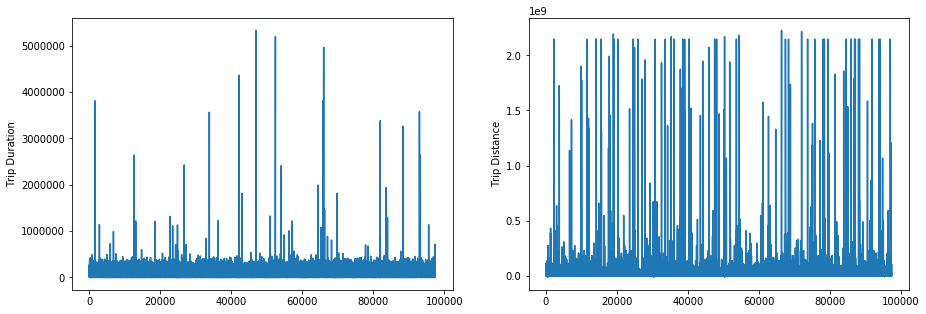

In [21]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(devicesUsage["Trip Duration"])
ax[0].set(ylabel='Trip Duration')
ax[1].plot(devicesUsage["Trip Distance"])
ax[1].set(ylabel='Trip Distance')

<div class="alert alert-success">
    <ul>
        <li>We have 97432 devices</li>
        <li>of them, we have 90957 scooters, 5932 bicycles, and 543 moped</li>
        <li>There's some great outliers for some devices as seen in the max values</li>
        <li>Trip Durations Mean was around 70000 seconds </li>
        <li>The trip distances mean was about 4000000 meters because it was largely impacted by the outliers, while the median was about 110000 meters which is a realistic amount</li>
    </ul>
<div>

### Let's look at the Trip Duration outliers <a class="anchor" id="duration"></a>

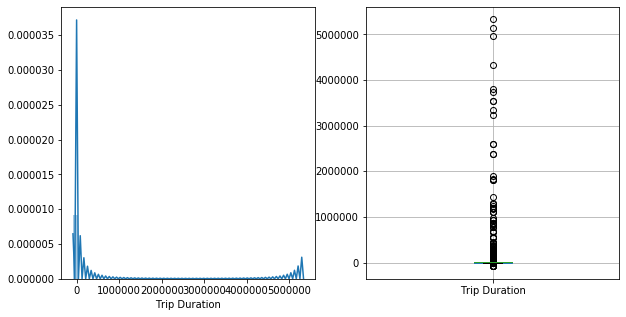

In [22]:
distplotDistribution(data, 'Trip Duration')

<div class="alert alert-danger">
There's negative values and extrem outliers that we need to remove</div>

In [23]:
data = data[(data["Trip Duration"] < 2000) & (data["Trip Duration"] >= 1)]

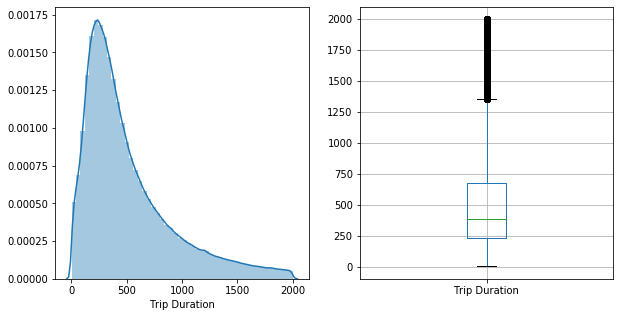

In [24]:
distplotDistribution(data, 'Trip Duration')

<div class="alert alert-success">
this looks so much better
</div>

### Now let's take a look at the Trip Distance <a class="anchor" id="distance"></a>

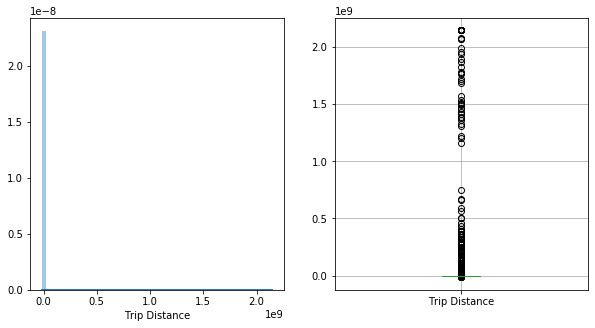

In [25]:
distplotDistribution(data, 'Trip Distance')

<div class="alert alert-danger">
There's negative values and extrem outliers that we need to remove</div>

In [26]:
data = data[(data["Trip Distance"] < 5000) & (data["Trip Distance"] >= 1)]

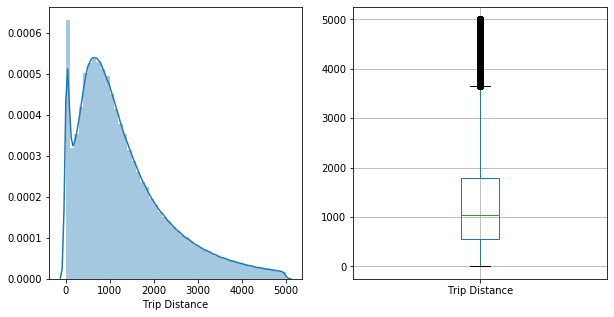

In [27]:
distplotDistribution(data, 'Trip Distance')

<div class="alert alert-success">
this looks right!
</div>

### Distribution of trips among years  <a class="anchor" id="yearsVScount"></a>

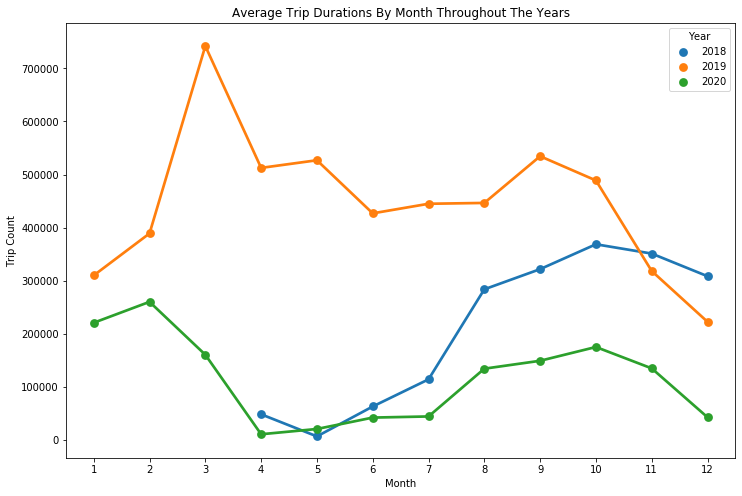

In [28]:
fig,ax1= plt.subplots()
fig.set_size_inches(12,8)
AggregatedPointPlot(data, ["Month","Year"], "count", ax1, "Average Trip Durations By Month Throughout The Years", "Trip Count")

<div class="alert alert-warning">
The distributon increased after 2018 throughout 2019 but decreased drastically from the end of 2019 untill the end of 2020 probably because of the pandamic. the year column will be deleted.
</div>

In [29]:
data = data.drop(["Year"],axis=1)


### Trips ditribution among Months  <a class="anchor" id="monthsVScount"></a>

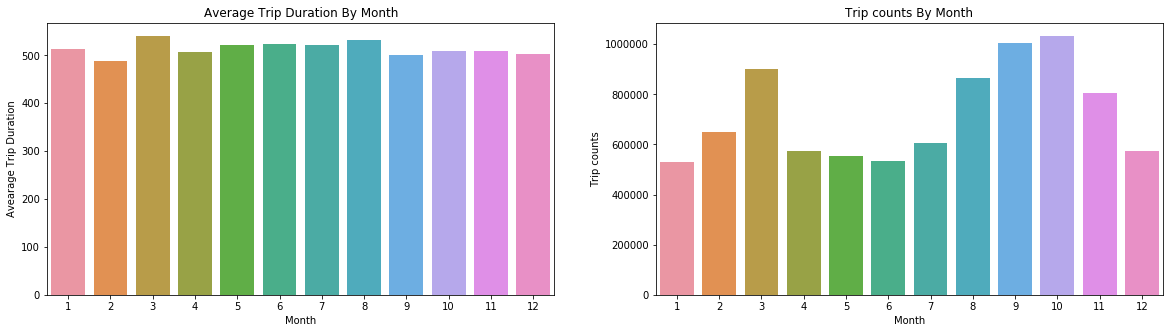

In [30]:
fig,ax= plt.subplots(1,2)
fig.set_size_inches(20,5)

AggregatedBarPlot(data, 'Month', 'mean', ax[0], 'Average Trip Duration By Month' ,'Avearage Trip Duration')
AggregatedBarPlot(data, 'Month', 'count', ax[1], 'Trip counts By Month' ,'Trip counts')

<div class="alert alert-success">
    The Trip Duration is steady in all months, but ther's a variety in the trip counts in months!<br>
    We can see a pattern among <b>Seasons</b>, Let's create a new feature for the season and explore it
</div>

In [31]:
data["Season"] = data["Month"]%12 // 3 + 1

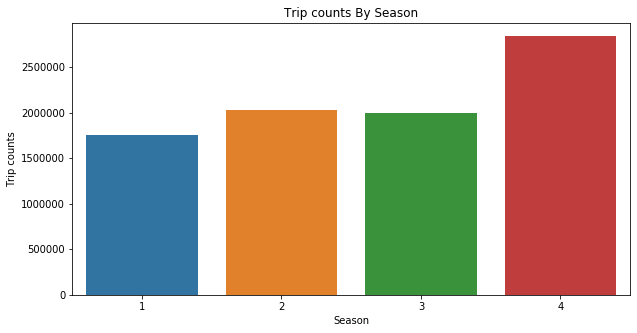

In [32]:
fig,ax= plt.subplots()
fig.set_size_inches(10,5)

AggregatedBarPlot(data, 'Season', 'count', ax, 'Trip counts By Season' ,'Trip counts')

<div class="alert alert-success">
We can clearly see how the trips are in their lowest throughout winter(1), and increase in spring, summer and autmn.</div>

### Trip distribution among the day of the week  <a class="anchor" id="dayVScount"></a>

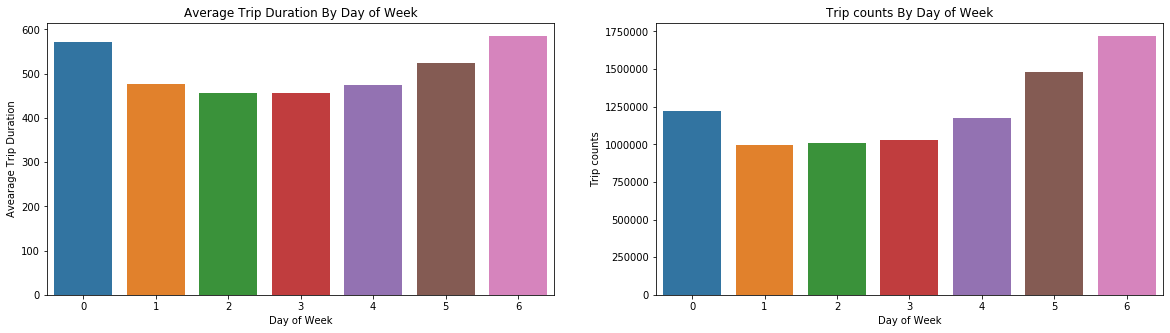

In [33]:
fig,ax= plt.subplots(1,2)
fig.set_size_inches(20,5)

AggregatedBarPlot(data, 'Day of Week', 'mean', ax[0], 'Average Trip Duration By Day of Week' ,'Avearage Trip Duration')
AggregatedBarPlot(data, 'Day of Week', 'count', ax[1], 'Trip counts By Day of Week' ,'Trip counts')

<div class="alert alert-success">
the average trip duration is almost steady throughout the week with minor differences, but the trip count varies. <br>
    you can see that in weekends there's a pattern of more rentals. Let's create a boolean feature called <b>weekend</b> and explore it!
</div>

In [34]:
data["weekend"] = data["Day of Week"].astype(int)
data['weekend'].replace({1: 0,
                      2: 0,
                      3: 0,
                      4: 0,
                      5: 0,
                      6: 1, 0: 1}, inplace=True)

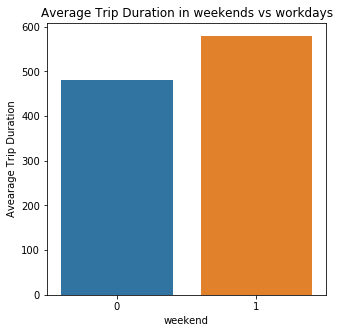

In [35]:
fig,ax= plt.subplots()
fig.set_size_inches(5,5)

AggregatedBarPlot(data, 'weekend', 'mean', ax, 'Average Trip Duration in weekends vs workdays' ,'Avearage Trip Duration')

### Distribution of trips among hour of the day  <a class="anchor" id="hourVScount"></a>

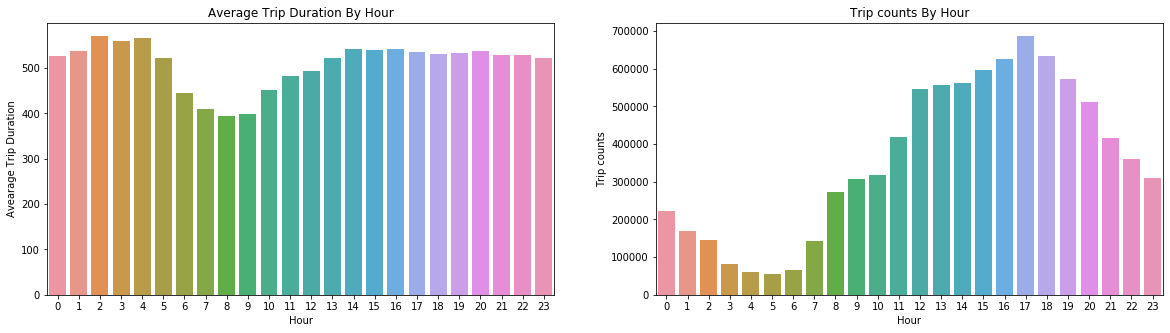

In [36]:
fig,ax= plt.subplots(1,2)
fig.set_size_inches(20,5)

AggregatedBarPlot(data, 'Hour', 'mean', ax[0], 'Average Trip Duration By Hour' ,'Avearage Trip Duration')
AggregatedBarPlot(data, 'Hour', 'count', ax[1], 'Trip counts By Hour' ,'Trip counts')

<div class="alert alert-success">
the average trip duration is almost steady throughout the day with minor differences, but the trip count varies A LOT. <br>
you can see patterns in parts of the day, let's create a feature called <b>period</b> to reflect these patterns
</div>

In [37]:
data['period'] = (data['Hour']% 24 + 4) // 4
data['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

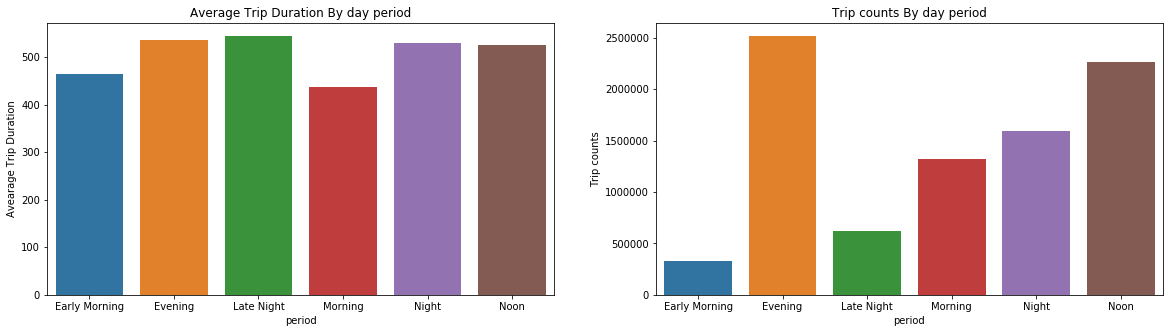

In [38]:
fig,ax= plt.subplots(1,2)
fig.set_size_inches(20,5)

AggregatedBarPlot(data, 'period', 'mean', ax[0], 'Average Trip Duration By day period' ,'Avearage Trip Duration')
AggregatedBarPlot(data, 'period', 'count', ax[1], 'Trip counts By day period' ,'Trip counts')

<div class="alert alert-success">
you can see that most of the trips occured in the evening and noon while the least were in the early morning and late night!</div>

### Distribution of trips among Council Districts  <a class="anchor" id="districtVScount"></a>

In [39]:
data["Council District (Start)"].unique()

array([3, 9, 5, 1, 4, 8, 7, 10, 2, 0, '9', '3', '7', '1', '0', '5', '8',
       '10', '2', '4', 'None', '6', 6], dtype=object)

<div class="alert alert-danger">
    <ul>
    <li>there's None values as a string that weren't cleaned in the cleaning process, we need to get rid of those<br></li>
    <li>we also need to transform all the values to int </li>
    </ul>
</div>

In [40]:
#removeng 'None' values
data = data[data["Council District (Start)"] != 'None']
data = data[data["Council District (End)"] != 'None']
#casting the column to int
data["Council District (Start)"] = data["Council District (Start)"].astype(int)
data["Council District (End)"] = data["Council District (End)"].astype(int)

<div class="alert alert-info">
Let's explore the data distribution
</div>

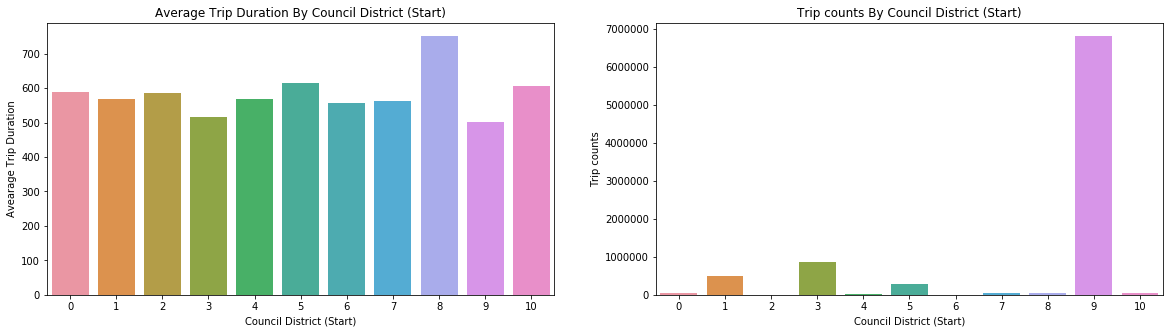

In [41]:
fig,ax= plt.subplots(1,2)
fig.set_size_inches(20,5)

AggregatedBarPlot(data, 'Council District (Start)', 'mean', ax[0], 'Average Trip Duration By Council District (Start)' ,'Avearage Trip Duration')
AggregatedBarPlot(data, 'Council District (Start)', 'count', ax[1], 'Trip counts By Council District (Start)' ,'Trip counts')

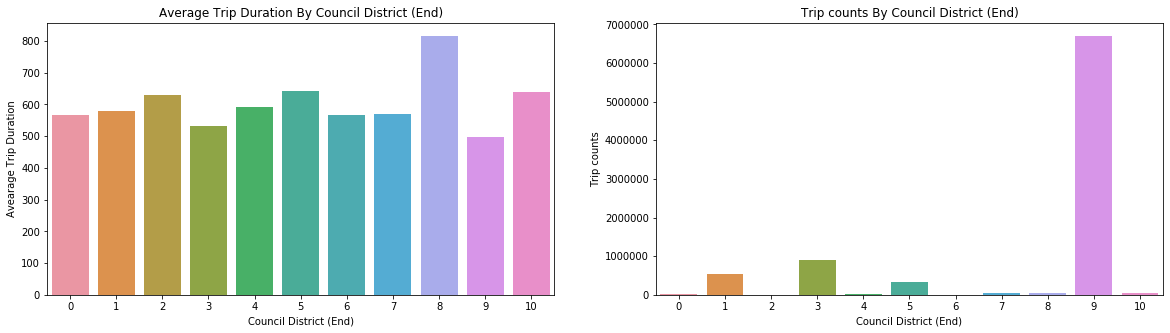

In [42]:
fig,ax= plt.subplots(1,2)
fig.set_size_inches(20,5)

AggregatedBarPlot(data, 'Council District (End)', 'mean', ax[0], 'Average Trip Duration By Council District (End)' ,'Avearage Trip Duration')
AggregatedBarPlot(data, 'Council District (End)', 'count', ax[1], 'Trip counts By Council District (End)' ,'Trip counts')

<div class="alert alert-danger">
    As you can see the location data is extremely skewed. most of the trips start and end in district 9
</div>

## Trip distibution among multiple factors simultaneously  <a class="anchor" id="multi"></a>

### - Trip counts: Vehicle Type vs. Season, Hour, period of the day, and Day of Week  <a class="anchor" id="multi1"></a>

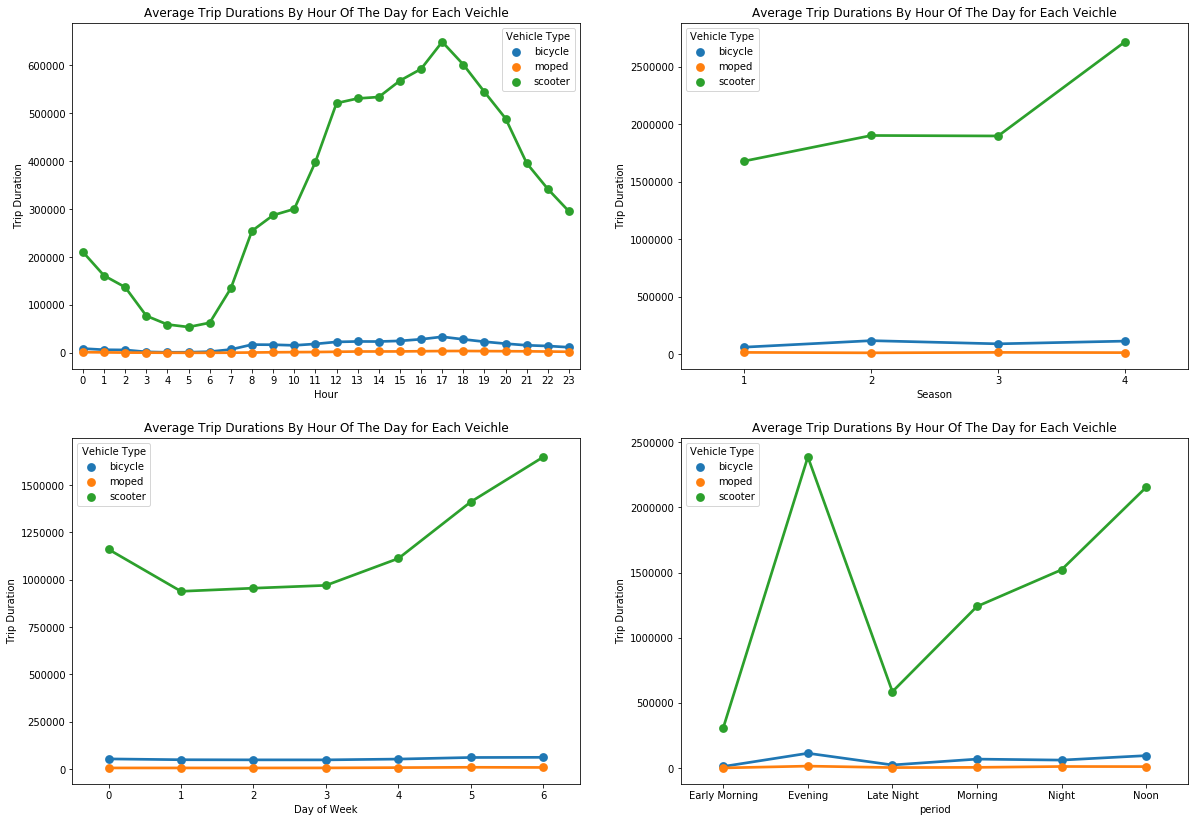

In [43]:
fig,ax= plt.subplots(2,2)
fig.set_size_inches(20,14)

AggregatedPointPlot(data, ["Hour","Vehicle Type"], "count", ax[0][0], "Average Trip Durations By Hour Of The Day for Each Veichle", "Trip Duration")
AggregatedPointPlot(data, ["Season","Vehicle Type"], "count", ax[0][1], "Average Trip Durations By Hour Of The Day for Each Veichle", "Trip Duration")
AggregatedPointPlot(data, ["Day of Week","Vehicle Type"], "count", ax[1][0], "Average Trip Durations By Hour Of The Day for Each Veichle", "Trip Duration")
AggregatedPointPlot(data, ["period","Vehicle Type"], "count", ax[1][1], "Average Trip Durations By Hour Of The Day for Each Veichle", "Trip Duration")


<div class="alert alert-success">
    <ul>
        <li>Bicycles are the most used devices in general, even though there's so much more scooters in the company.</li>
    </ul>

</div>

<div class="alert alert-danger">
    <ul>
        <li>All of the distributions we've studied are affected by the batterns of bicycles usage, scooters and moped have a stable trip count no matter what the variables are!</li>
    </ul>

</div>

### - Trip counts: Day of Week vs Hour and period of the day   <a class="anchor" id="multi2"></a>

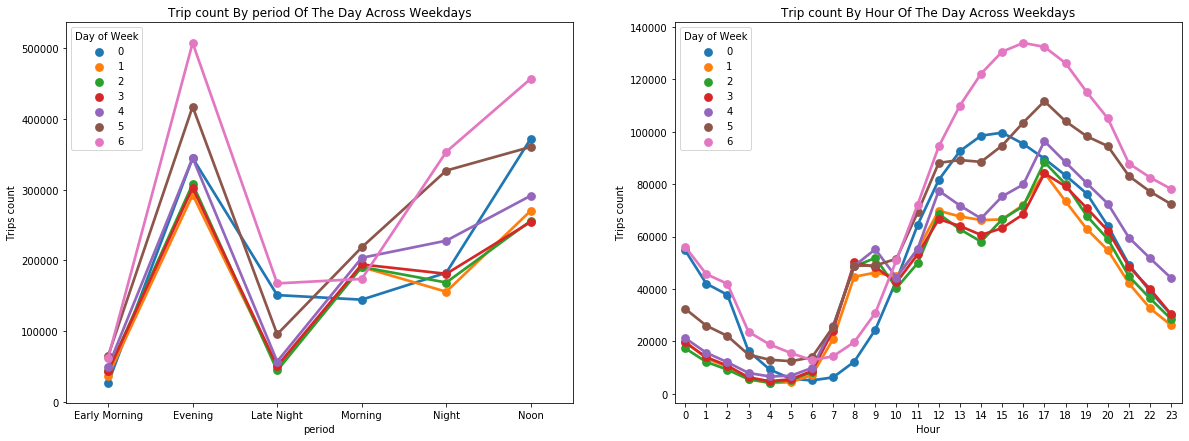

In [44]:
fig,ax= plt.subplots(1,2)
fig.set_size_inches(20,7)
AggregatedPointPlot(data, ["period","Day of Week"], "count", ax[0], "Trip count By period Of The Day Across Weekdays", "Trips count")
AggregatedPointPlot(data, ["Hour","Day of Week"], "count", ax[1], "Trip count By Hour Of The Day Across Weekdays", "Trips count")

<div class="alert alert-success">
    <ul>
        <li>As predicted, the pattern is the same for all days except weekends!</li>
    </ul>

</div>

## Trip Distribution Among Austin's Census data  <a class="anchor" id="census"></a>

<div class="alert alert-info">
    <b>Census Tract Start</b> and <b>Census Tract End</b> columns have a lot of error in them, they have values in the value <b>'OUT_OF_BOUNDS'</b> and lots of syntax errors. 
    <br>Let's clean them up and check their distribution
</div>

In [45]:
data = data[data["Census Tract Start"] != 'OUT_OF_BOUNDS']
data = data[pd.to_numeric(data["Census Tract Start"], errors='coerce').notnull()]
data = data[data["Census Tract End"] != 'OUT_OF_BOUNDS']
data = data[pd.to_numeric(data["Census Tract End"], errors='coerce').notnull()]


<div class="alert alert-warning">
    We'll be using <b>geopandas</b> for ploting the geo data, for installation using pip follow these instructions
    <details>
        <summary><b>Instructions</b></summary>
        <ul>
            <li>pip install wheel</li>
            <li>pip install pipwin</li>
            <li>pipwin install numpy</li>        
            <li>pipwin install pandas</li>
            <li>pipwin install shapely</li>
            <li>pipwin install gdal</li>        
            <li>pipwin install fiona</li>
            <li>pipwin install pyproj</li>
            <li>pipwin install six</li>
            <li>pipwin install rtree</li>
            <li>pipwin install geopandas</li>
        </ul>
    </details>

</div>

In [46]:
import geopandas as gpd
from sklearn import preprocessing

In [47]:
#reading the shapefile of texas's counties locations
places = gpd.read_file('tl_2016_48_cousub/tl_2016_48_cousub.shp')
#extract Austin's location on the map
austin = places[places["NAME"]=="Austin"]

#reading the shapefile of texas's blocks information (Census GeoIds, ...)
blocks_map_2010 = gpd.read_file('cb_2019_48_tract_500k/cb_2019_48_tract_500k.shp')

In [48]:
def plotDistribution(feature, featureType, color, title, route): 
    '''
    function: plots the distribution of trip counts among Austin 
    inputs: feature: Geo Ids column name in the data that we want to plot
            featureType: the name of the GeoId column in the blocks shapefile 
            color: cmap color for the plot
            title: title of the plot
            route: route to extract the plot to
    outputs: distribution plot of the records in Austin
             png image of the plot extracted to the inputed route
    '''
    #rename the GeoId column in the dataframe to match the one in the shapefile dataframe
    #group the data by that column and calculate the number of trips for each geoId
    censusTractData = data.rename(columns={feature: featureType})[[featureType, 'Trip Duration']] \
    .groupby(by=[featureType])["Trip Duration"].count().reset_index()
    
    #apply log transform to the count to reduce the skeweness 
    censusTractData["Trip Duration"] = np.log((1+ censusTractData["Trip Duration"]))

    #merge the dataframe with the shapefile dataframe
    mergedCensus = blocks_map_2010.merge(censusTractData, how='inner', on=featureType)
    #keep only blocks in Austin's county
    mergedCensus = mergedCensus[mergedCensus["COUNTYFP"]=="453"]
    
    #plot the heatmap for the normallized counts
    fig, ax = plt.subplots(figsize=(12,12))
    mergedCensus.plot(ax=ax, column='Trip Duration', cmap=color, legend=True)
    ax.set_title(title, fontsize=20)
    #plot the outline of Austin's county
    austin.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=.9) 
    
    #save the plot for later use
    plt.savefig(route)

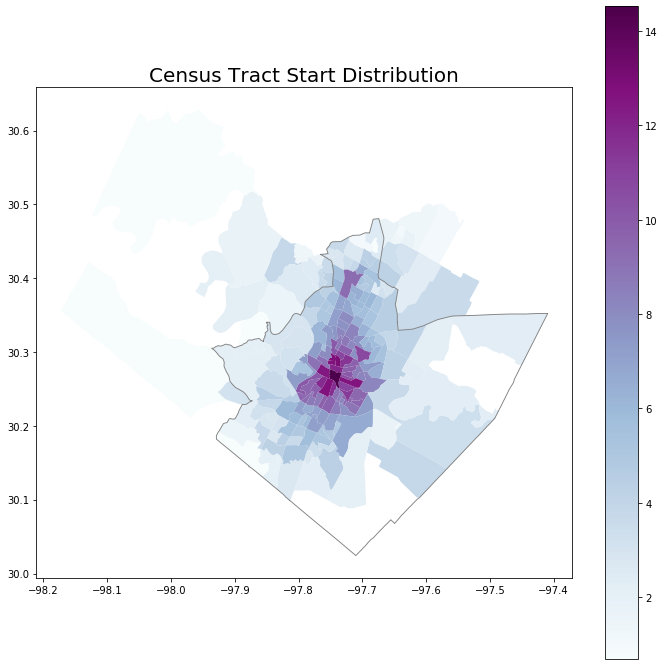

In [49]:
plotDistribution('Census Tract Start', 'GEOID', 'BuPu', 'Census Tract Start Distribution', 'censusStart.png')

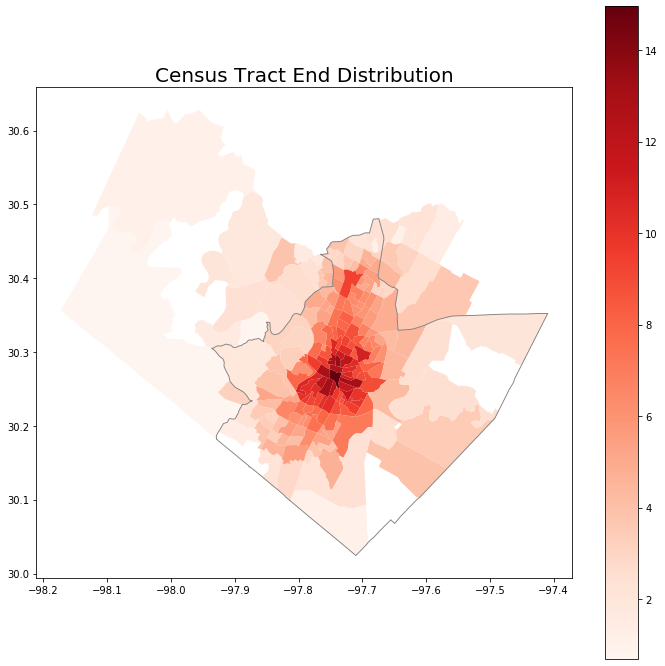

In [50]:
plotDistribution('Census Tract End', 'GEOID', 'Reds', 'Census Tract End Distribution', 'censusEnd.png')

<div class="alert alert-success">
This matches the results we've concluded before(that most of the trips start and end in district nine which is located in the center of the plot! 
</div>

<div class="alert alert-warning">
But the GeoId is too specific to be used in building the model, so we will discard it in the next steps 
</div>

In [51]:
data = data.drop(["Census Tract Start", "Census Tract End"],axis=1)

## Building The Demand Data<a class="anchor" id="demand"></a>

<div class="alert alert-info">
    to create the demand dataframe <b>Vehicle Type, Season, period, weekend, and Council District (Start)</b> were chosen to group the data and count the number of trips for each combination 
</div>

In [52]:
demandData = pd.DataFrame(data.groupby(by = ["Vehicle Type", "Season", "period", "weekend", "Council District (Start)"])["Trip Duration"].count()).reset_index().rename(columns={"Trip Duration": "Trip Count"})
demandData.describe()

,Season,weekend,Council District (Start),Trip Count
count,1254.000000,1254.000000,1254.000000,1254.000000
mean,2.498405,0.487241,5.220893,6847.922648
std,1.124882,0.500037,3.130803,32216.249267
min,1.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,3.000000,16.000000
50%,2.000000,0.000000,5.000000,135.000000
75%,4.000000,1.000000,8.000000,1013.000000
max,4.000000,1.000000,10.000000,392888.000000


<div class="alert alert-warning">
    <b>Vehicle Type and period</b> are categorical variables, so we can't use them in a Gradient boostin tree, so we'll do a hot encoding for each one! 
</div>

In [53]:
#hot encoding Vehicle Type and period columns and dropping the original columns
hot_encoded_data = demandData.join(pd.get_dummies(demandData["period"], prefix="period")) \
                             .join(pd.get_dummies(demandData["Vehicle Type"], prefix="Vehicle Type")) 
hot_encoded_data = hot_encoded_data.drop(["period", "Vehicle Type"],axis=1)
hot_encoded_data

,Season,weekend,Council District (Start),Trip Count,period_Early Morning,period_Evening,period_Late Night,period_Morning,period_Night,period_Noon,Vehicle Type_bicycle,Vehicle Type_moped,Vehicle Type_scooter
0,1,0,1,119,1,0,0,0,0,0,1,0,0
1,1,0,2,1,1,0,0,0,0,0,1,0,0
2,1,0,3,307,1,0,0,0,0,0,1,0,0
3,1,0,4,1,1,0,0,0,0,0,1,0,0
4,1,0,5,132,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,4,1,6,21,0,0,0,0,0,1,0,0,1
1250,4,1,7,1654,0,0,0,0,0,1,0,0,1
1251,4,1,8,1781,0,0,0,0,0,1,0,0,1
1252,4,1,9,193669,0,0,0,0,0,1,0,0,1


<div class="alert alert-info">
let's look at the labels distribution</div>

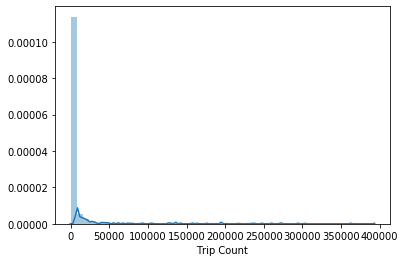

In [55]:
sns.distplot(hot_encoded_data["Trip Count"])

<div class="alert alert-warning">
there's some extreme outliers let's normalise those</div>

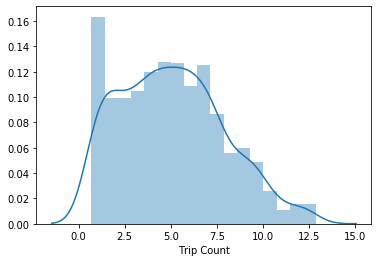

In [57]:
hot_encoded_data["Trip Count"] = np.log((1+ hot_encoded_data["Trip Count"]))
sns.distplot(hot_encoded_data["Trip Count"])

## Gradient Boosting Regressor <a class="anchor" id="regressor"></a>

In [58]:
#importing needed packages
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from pprint import pprint

In [59]:
#seperating the data from the labels
x = hot_encoded_data.drop(["Trip Count"],axis=1)
y = hot_encoded_data["Trip Count"]

In [60]:
X_data, X_leftout, y_data, y_leftout = train_test_split(x, y, test_size= 0.20)

In [62]:
#splitting the data into x,y training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_leftout, y_leftout, test_size= 0.30)

In [63]:
#Let's do the same for the data that's not hot encoded for model intrepretation
x_disp = demandData.drop(["Trip Count"],axis=1)
y_disp = demandData["Trip Count"]
X_train_disp, X_test_disp, y_train_disp, y_test_disp = train_test_split(x_disp, y_disp, test_size= 0.30)

In [64]:
#Let's try using a normal regressor without Grid search
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [65]:
regressor.score(X_test, y_test)

0.8574054203246783

<div class="alert alert-info">
Let's try doing a Grid search to find the best parameters and get a better score</div>

### Hyper Parameters Tuning with Cross Validation <a class="anchor" id="hyper"></a>

In [66]:
#initializing the GradientBoostingRegressor 
gbt = GradientBoostingRegressor(random_state = 42)

In [67]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 13, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 7]
# Method of selecting samples for training each tree
learning_rate = [0.01, 0.1]
# Create the random grid
grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}
pprint(grid)

{'learning_rate': [0.01, 0.1],
 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, None],
 'min_samples_leaf': [2, 4, 7],
 'min_samples_split': [5, 10, 16],
 'n_estimators': [100, 200, 300, 400, 500]}


In [68]:
from sklearn.model_selection import GridSearchCV
#initialize the grid search
gbt = GridSearchCV(estimator = gbt, # the base model
                               param_grid = grid, # grid of hyper parameters
                               cv = 5, #5-fold cross validation
                               verbose=2, #messeges level
                               n_jobs = -1) # use all cores in the machine to train (parallel)

In [69]:
gbt

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [70]:
gbt.fit(X_train, y_train)

Fitting 5 folds for each of 990 candidates, totalling 4950 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4950 out of 4950 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [71]:
best_gbt_model = gbt.best_estimator_
best_gbt_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=16,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
predicted = best_gbt_model.predict(X_test)

In [73]:
best_gbt_model.score(X_test, y_test)

0.8906699953123446

<div class="alert alert-success">
This score is higher compared to the first one!</div>

<div class="alert alert-info">
let's calculate the accuracy for the left out data</div>

In [86]:
best_gbt_model.score(X_leftout, y_leftout)

0.9636814703726362

<div class="alert alert-success">
The accuracy is magnificant</div>

## Model Interpretation  <a class="anchor" id="Interpretation"></a>

In [74]:
best_gbt_model.feature_importances_

array([0.02428347, 0.0372511 , 0.59918366, 0.03060169, 0.01773884,
       0.04477075, 0.00380353, 0.00396894, 0.01004766, 0.01376066,
       0.03366909, 0.18092061])

Text(0.5, 0, 'features')

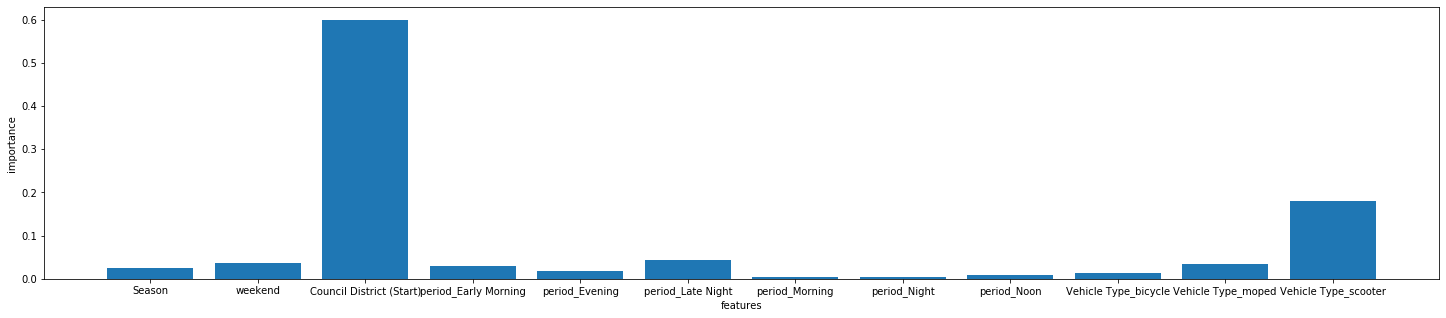

In [75]:
#find columns names
columns = x.columns

#plot each feature with its importance in the model
plt.figure(figsize=(25, 5))
plt.bar(columns, best_gbt_model.feature_importances_)
plt.ylabel("importance")
plt.xlabel("features")


<div class="alert alert-success">
These are the weights for each feature in the model </div>

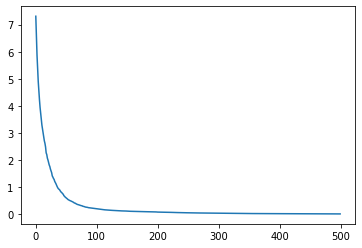

In [76]:
plt.plot(best_gbt_model.train_score_)

<div class="alert alert-success">
These are the loss values througout the model updates </div>

In [77]:
import shap

In [78]:
explainer = shap.TreeExplainer(best_gbt_model)
shap_values = explainer.shap_values(X_test)
print('Expected Value:', explainer.expected_value)
pd.DataFrame(shap_values).head()

Expected Value: [5.52443318]


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.028554,0.241545,-1.928135,0.268833,-0.065402,0.162752,0.168629,0.010566,-0.105205,0.060515,0.362293,-1.211755
1,-0.005486,0.460393,-1.327484,0.219418,-0.143053,0.240906,-0.018697,-0.118351,-0.081647,0.094786,0.234181,-1.115072
2,0.079371,0.340546,1.451409,0.242266,-0.042959,0.213874,0.012760,0.015518,0.238108,-0.052377,0.260167,1.590092
3,0.018966,-0.369456,-0.711049,0.174641,-0.138990,0.186296,0.000833,0.031359,0.520903,-0.086198,0.278264,1.543437
4,0.453696,-0.372072,-0.662778,-0.585916,-0.148045,0.124893,-0.022811,-0.001289,-0.113748,0.118834,0.280798,-0.997151


<div class="alert alert-success">
Each row in this dataframe sums to the difference between the model output for that sample and the expected value of the model output (which is stored as expected_value = 5.52443318), this helps explain why the model predicts such skewed values </div>

In [79]:
#initialling shap to plot the plots down below
shap.initjs()

In [80]:
shap_values[0,:]

array([-0.02855351,  0.24154527, -1.92813462,  0.26883339, -0.06540192,
        0.1627525 ,  0.16862923,  0.01056629, -0.10520494,  0.06051511,
        0.36229308, -1.21175482])

In [81]:
#this plot shows what featurre impacted this record to get an output of 171.99
shap.force_plot(explainer.expected_value, 
                shap_values[0,:], X_test.iloc[0,:])

In [82]:
#this plot shows what featurre impacted this record to get an output of 480.79
shap.force_plot(explainer.expected_value, 
                shap_values[1,:], X_test.iloc[1,:])

<div class="alert alert-success">
the councul district and vehicle type_scooter are pushing the values down in bothe cases when the predicted value was around the expected value
</div>

<div class="alert alert-info">
Visualizing and explaining multiple predictions together
</div>

In [87]:
shap.force_plot(explainer.expected_value, 
                shap_values[:1000,:], X_test.iloc[:1000,:])

<div class="alert alert-success">
you can learn so much from this plot about how the model works, if you look at the sample order by output value for example you'll see how the distribution of values affected the model outputs, you can see that the highest values were when the device was a scooter in season4 starting from district9  </div>

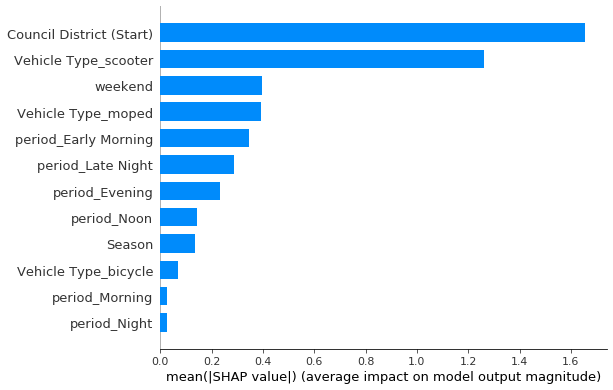

In [88]:
shap.summary_plot(shap_values, 
                  X_test, plot_type="bar")

<div class="alert alert-success">
This plots shows the importance of each feature
</div>

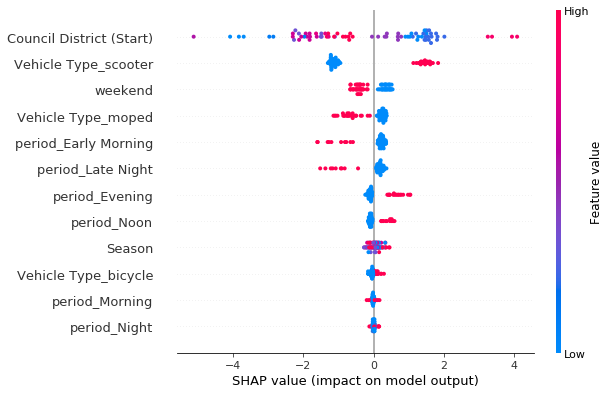

In [89]:
shap.summary_plot(shap_values, X_test)

<div class="alert alert-success">
in this plot you can see how each sample was affected by the value of each feature and how high is its value<br>
</div>